In [4]:
import asyncio
import sys

if sys.platform == 'win32':
    asyncio.set_event_loop_policy(asyncio.WindowsSelectorEventLoopPolicy())

Task 2.1: Summary Statistics & Missing-Value Report

In [19]:
import pandas as pd
import numpy as np
df = pd.read_csv('../../data/raw/sierraleone-bumbuna.csv')
# Task 2.1.1: Summary statistics
summary_stats = df.describe()
print("Summary Statistics:")
display(summary_stats)
# Task 2.1.2: Missing values
missing_count = df.isna().sum()
missing_percent = (missing_count / len(df)) * 100
cols_over_5pct_null = missing_percent[missing_percent > 5]
print("Columns with >5% missing values:")
print(cols_over_5pct_null)

Summary Statistics:


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


Columns with >5% missing values:
Comments    100.0
dtype: float64


Task 2.2: Outlier Detection & Cleaning

2.2.1: Missing value, outlier, and inccoret data entries

Missing values in key columns:
GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64


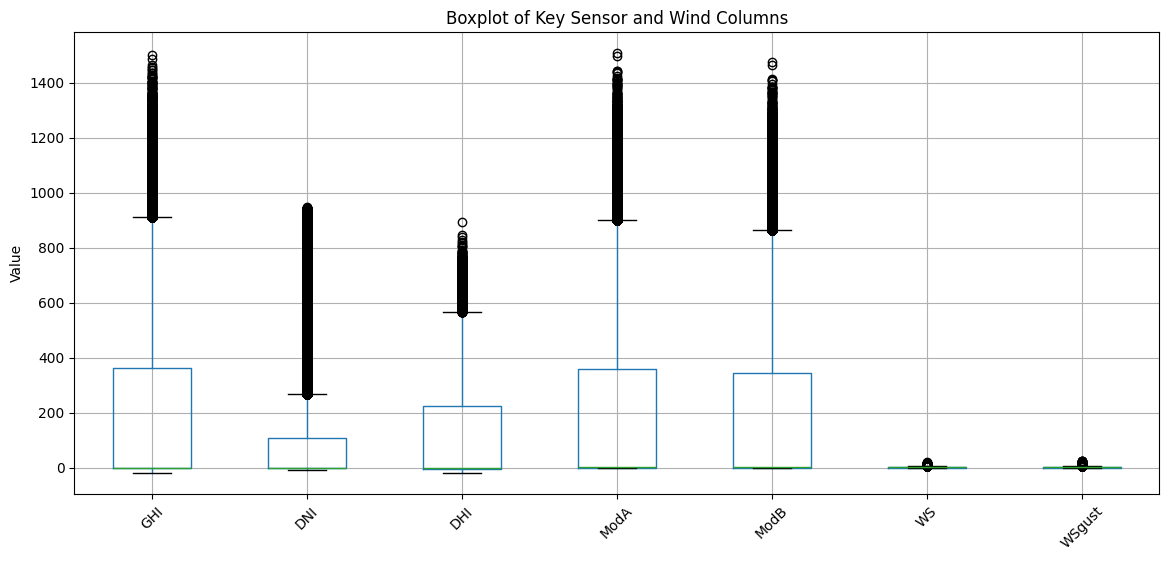

Count of negative (incorrect) entries in each column:
GHI       261135
DNI       266352
DHI       263128
ModA           0
ModB           0
WS             0
WSgust         0
dtype: int64


In [6]:
import matplotlib.pyplot as plt

# check for missing values in key columns
cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
missing_report = df[cols].isna().sum()
print("Missing values in key columns:")
print(missing_report)

# check for outliers in key columns
plt.figure(figsize=(14, 6))
df[cols].boxplot()
plt.title('Boxplot of Key Sensor and Wind Columns')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()
# Check for negative values (not physically possible)
negatives = (df[cols] < 0).sum()
print("Count of negative (incorrect) entries in each column:")
print(negatives)


2.2.2: Compute Z-scores

In [7]:
from scipy.stats import zscore

cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Compute Z-scores for the selected columns
z_scores = df[cols].apply(zscore)

# Flag rows where any column has |Z| > 3
outlier_rows = (z_scores.abs() > 3).any(axis=1)

print(f"Number of rows with at least one outlier (|Z| > 3): {outlier_rows.sum()}")
print("Indices of outlier rows:")
print(df.index[outlier_rows].tolist())

Number of rows with at least one outlier (|Z| > 3): 16292
Indices of outlier rows:
[653, 654, 655, 656, 657, 662, 663, 670, 671, 672, 696, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 740, 741, 742, 743, 746, 747, 748, 749, 750, 751, 759, 760, 762, 769, 770, 771, 772, 778, 779, 780, 781, 782, 783, 784, 789, 790, 791, 792, 805, 1275, 1279, 1287, 2156, 2161, 2167, 2168, 2179, 2180, 2181, 2182, 2183, 2184, 2185, 2186, 2187, 2188, 2189, 2190, 2191, 2192, 2193, 2194, 2195, 2196, 2197, 2198, 2199, 2200, 2201, 2202, 2203, 2204, 2205, 2206, 2207, 2208, 2209, 2210, 2211, 2212, 2213, 2214, 2215, 2495, 2496, 2497, 2498, 2499, 2501, 2502, 2503, 2504, 2506, 2507, 2632, 2636, 2967, 3712, 3713, 3714, 3715, 3716, 3717, 3718, 4683, 4684, 4685, 4686, 4687, 4688, 4690, 4691, 4692, 4693, 4695, 4696, 4700, 4701, 4702, 4704, 4705, 5049, 5050, 5051, 5056, 5057,

2.2.3. Drop or impute (median) missing values

In [8]:
#Impute missing values with median
df[cols] = df[cols].fillna(df[cols].median())
print("Missing values after imputation (should be 0):")
print(df[cols].isna().sum())

Missing values after imputation (should be 0):
GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64


2.2.4:  Export the cleaned dataset

In [9]:
# Export the cleaned DataFrame to CSV
df.to_csv('../../data/clean/sierraleone_clean.csv')

Task 2.3: Time Series Analysis

2.3.1: Line charts

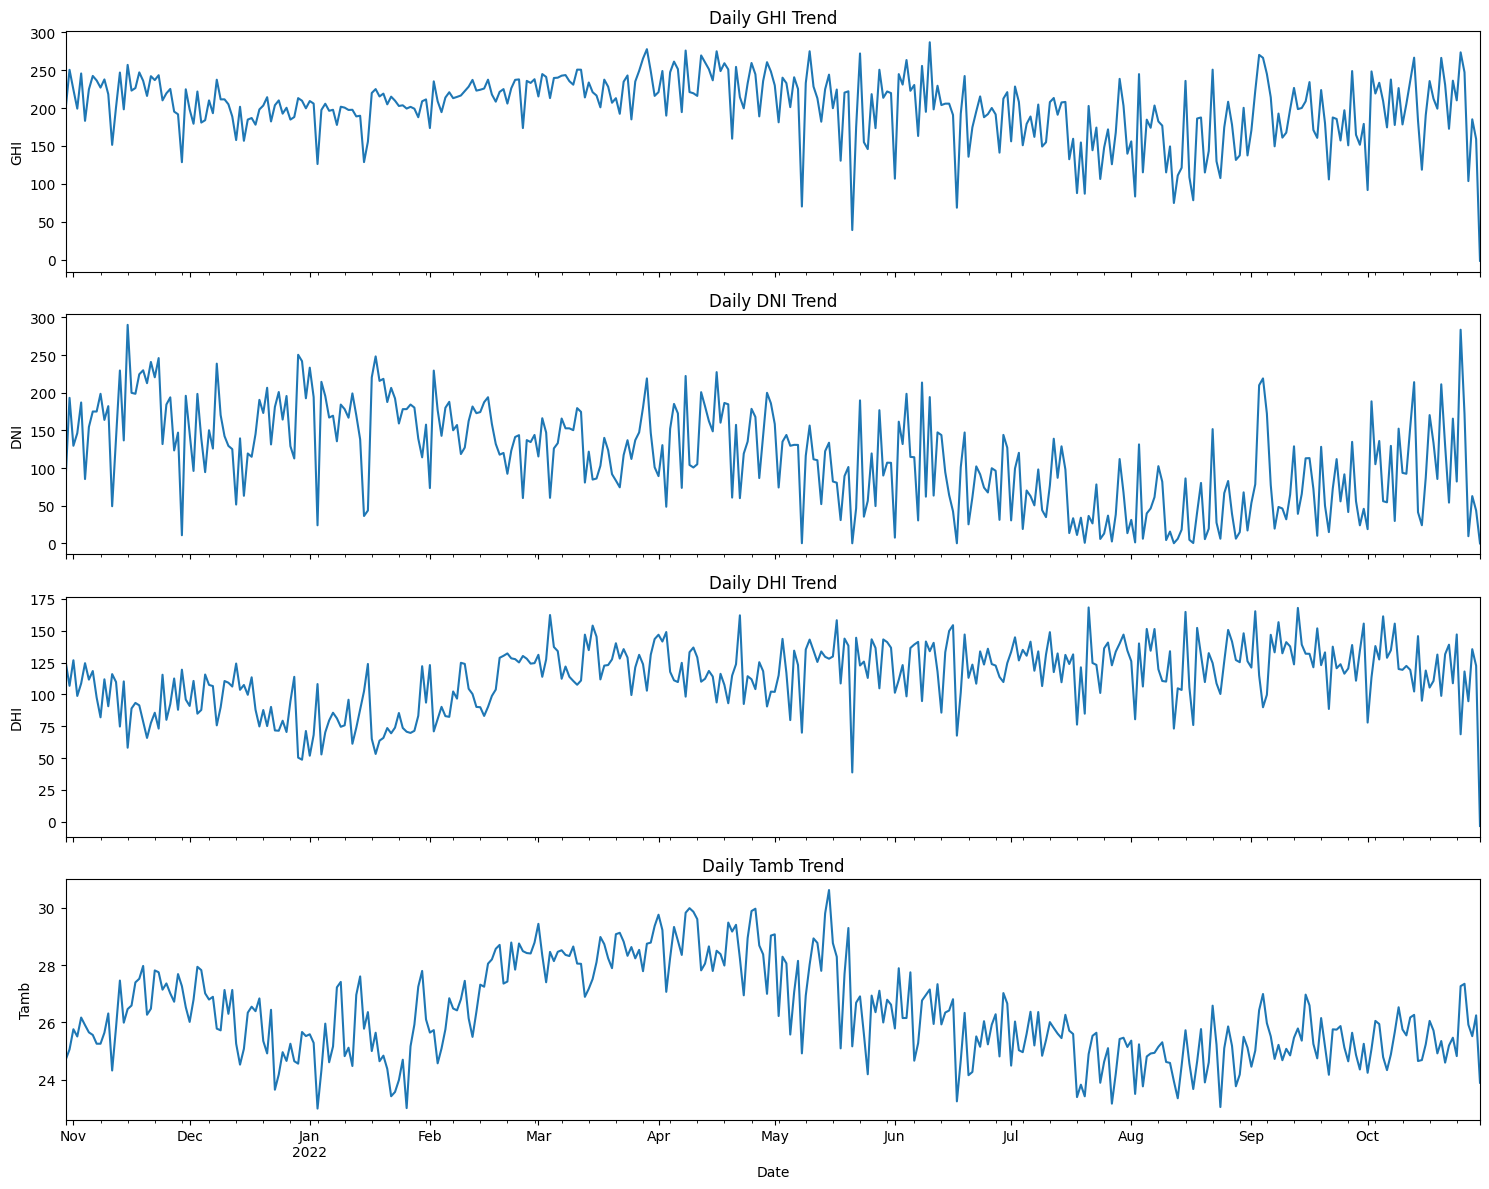

In [10]:
# If 'Timestamp' is already the index, reset it first
if df.index.name == 'Timestamp':
    df.reset_index(inplace=True)

# Convert 'Timestamp' to datetime and set as index
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

# Plot daily trends for GHI, DNI, DHI, Tamb
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 1, figsize=(15, 12), sharex=True)
metrics = ['GHI', 'DNI', 'DHI', 'Tamb']
for i, metric in enumerate(metrics):
    df[metric].resample('D').mean().plot(ax=axes[i], title=f'Daily {metric} Trend')
    axes[i].set_ylabel(metric)
plt.xlabel('Date')
plt.tight_layout()
plt.show()

2.3.2: Observe patterns
A. Monthly Patterns

<Figure size 1200x600 with 0 Axes>

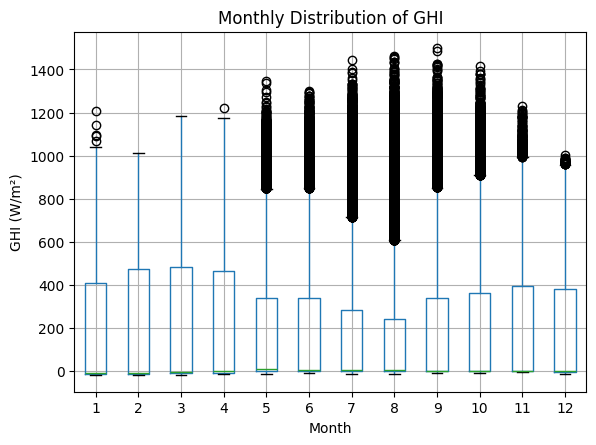

In [11]:
# Add a 'Month' column for grouping
df['Month'] = df.index.month

plt.figure(figsize=(12, 6))
df.boxplot(column='GHI', by='Month')
plt.title('Monthly Distribution of GHI')
plt.suptitle('')
plt.xlabel('Month')
plt.ylabel('GHI (W/m²)')
plt.show()

B. Daily Trends

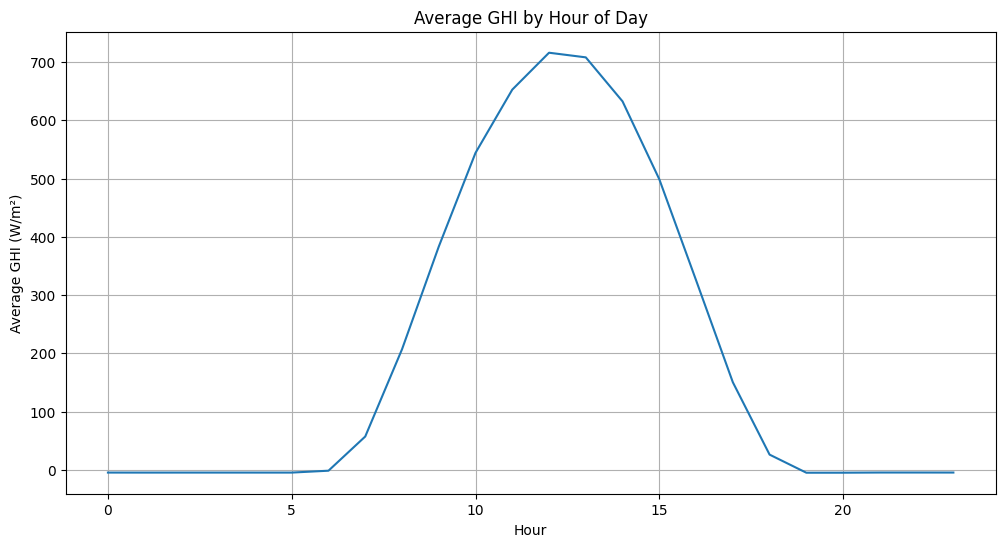

In [12]:
df['Hour'] = df.index.hour

plt.figure(figsize=(12, 6))
df.groupby('Hour')['GHI'].mean().plot()
plt.title('Average GHI by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Average GHI (W/m²)')
plt.grid(True)
plt.show()

C. Anomalies: Peaks and Fluctuations

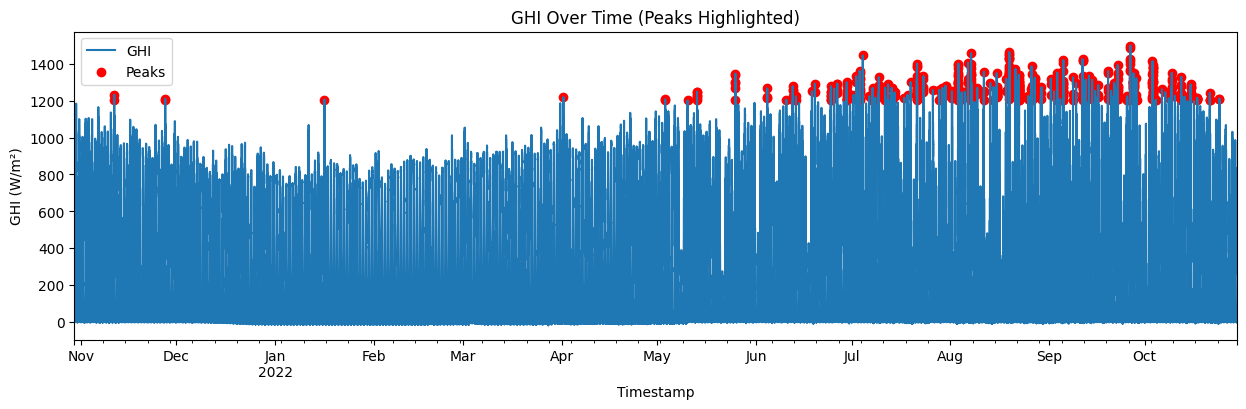

In [13]:
plt.figure(figsize=(15, 4))
df['GHI'].plot()
plt.title('GHI Over Time (Peaks Highlighted)')
plt.ylabel('GHI (W/m²)')
plt.xlabel('Timestamp')
# Highlight peaks above a threshold (e.g., 1200 W/m²)
peaks = df[df['GHI'] > 1200]
plt.scatter(peaks.index, peaks['GHI'], color='red', label='Peaks')
plt.legend()
plt.show()

Task 2.4: Cleaning Impact Analysis

<Figure size 800x400 with 0 Axes>

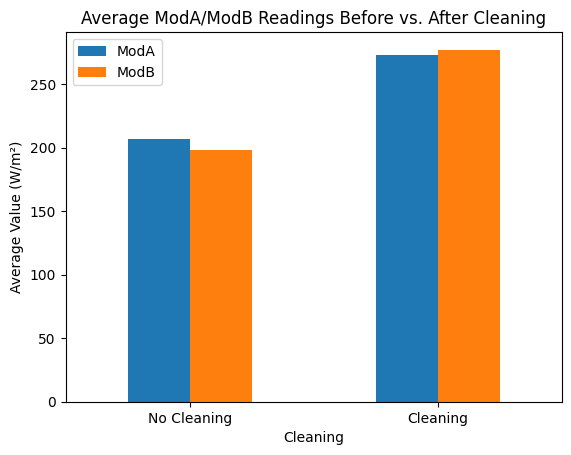

In [14]:
# Group by Cleaning flag
cleaning_impact = df.groupby('Cleaning')[['ModA', 'ModB']].mean().reset_index()

# Plot comparison
plt.figure(figsize=(8, 4))
cleaning_impact.set_index('Cleaning').plot(kind='bar', rot=0)
plt.title('Average ModA/ModB Readings Before vs. After Cleaning')
plt.xticks([0, 1], ['No Cleaning', 'Cleaning'])
plt.ylabel('Average Value (W/m²)')
plt.show()

Task 2.5: Correlation & Relationships

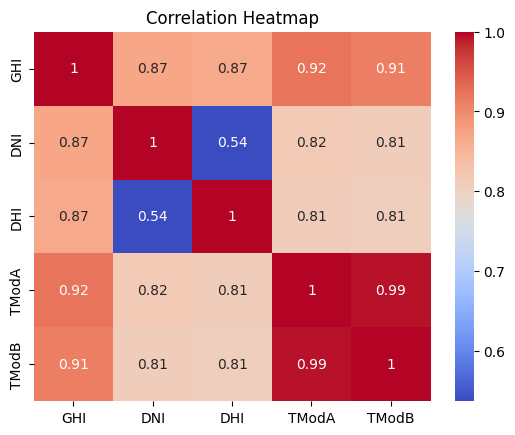

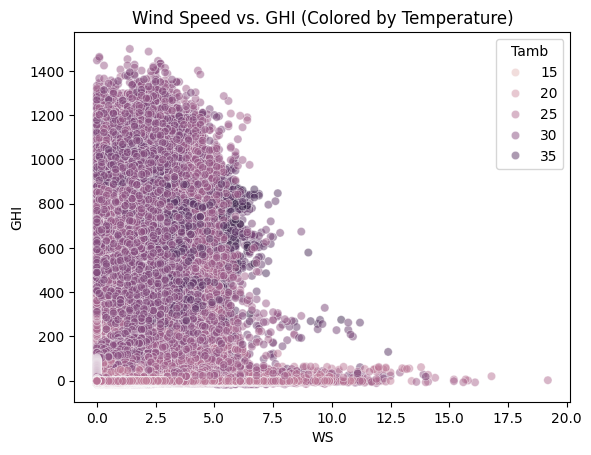

In [15]:
import seaborn as sns

# Heatmap
corr_matrix = df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Scatter Plots
sns.scatterplot(data=df, x='WS', y='GHI', hue='Tamb', alpha=0.5)
plt.title('Wind Speed vs. GHI (Colored by Temperature)')
plt.show()

Task 2.6: Wind & Distribution Analysis

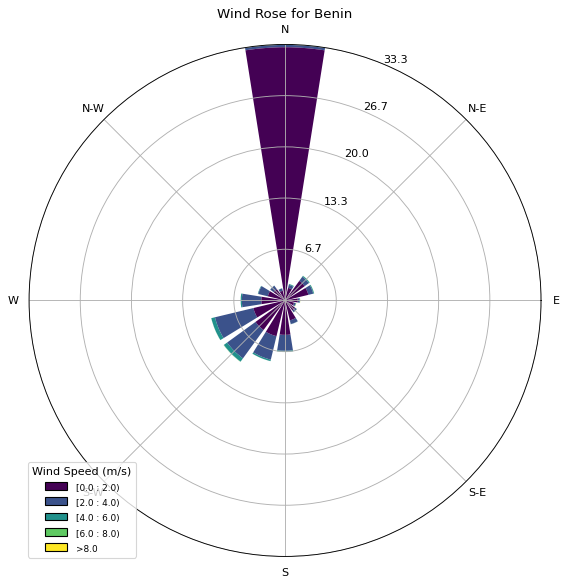

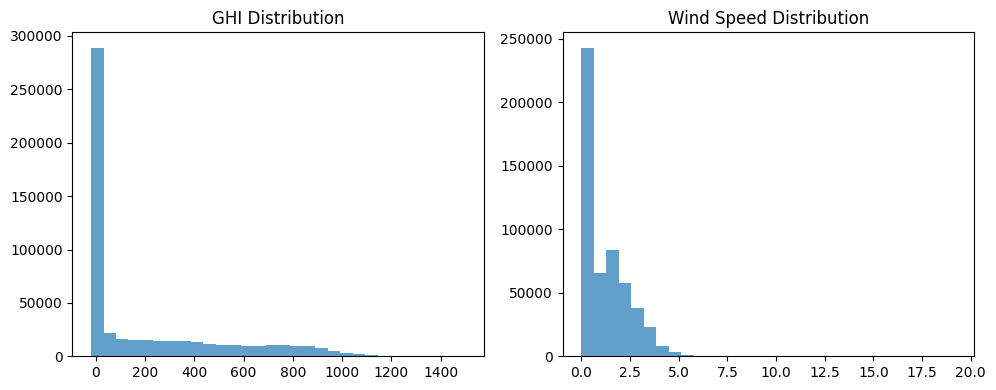

In [16]:
# Wind Rose (Install windrose: pip install windrose)
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, bins=np.arange(0, 10, 2))
ax.set_legend(title='Wind Speed (m/s)')
plt.title('Wind Rose for Benin')
plt.show()

# Histograms
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(df['GHI'], bins=30, alpha=0.7)
plt.title('GHI Distribution')

plt.subplot(1, 2, 2)
plt.hist(df['WS'], bins=30, alpha=0.7)
plt.title('Wind Speed Distribution')
plt.tight_layout()
plt.show()

Task 2.7: Temperature Analysis

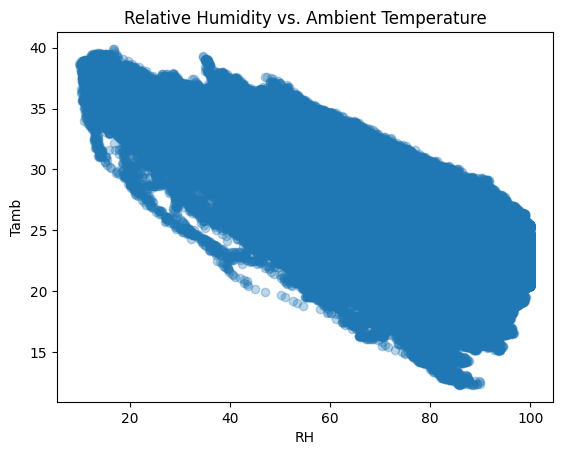

In [17]:
# RH vs. Tamb
sns.regplot(data=df, x='RH', y='Tamb', scatter_kws={'alpha': 0.3})
plt.title('Relative Humidity vs. Ambient Temperature')
plt.show()

Task 2.8: Bubble Chart

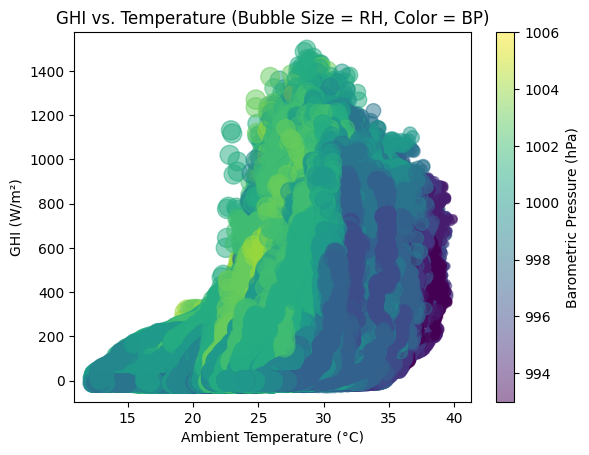

In [18]:
plt.scatter(
    x=df['Tamb'], 
    y=df['GHI'], 
    s=df['RH']*2,  # Bubble size = RH
    c=df['BP'],     # Color = BP
    alpha=0.5,
    cmap='viridis'
)
plt.colorbar(label='Barometric Pressure (hPa)')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('GHI (W/m²)')
plt.title('GHI vs. Temperature (Bubble Size = RH, Color = BP)')
plt.show()